## 🏡 Análise de Oportunidades no Mercado Imobiliário — Previsão e Clusterização de Estados para Identificação de Tendências e Crescimento

<div style="text-align: center; margin-bottom: 20px;">
  <img src="../03-Recursos/analysis_image.png" style="width: 600px; display: block; margin-left: auto; margin-right: auto;"/>
</div>

## SUMÁRIO <a id="sumário"></a>

[1. Introdução 🚀](#1-introdução) <br>

[2. Objetivo do Projeto 🎯](#2-objetivo-do-projeto) <br>

[3. Importação de Bibliotecas e Configurações Iniciais 📚](#3-importação-de-bibliotecas-e-configurações-iniciais) <br>

[4. Coleta e Carregamento dos Dados 📥](#4-coleta-e-carregamento-dos-dados) <br>

[5. Pré-processamento e Consolidação dos Dados 🔄](#5-pré-processamento-e-consolidação-dos-dados) <br>

[6. Análise Exploratória de Dados (EDA) 📊](#6-análise-exploratória-de-dados-eda) <br>

[7. Previsão Temporal de Estados para 2021-2022 🔮](#7-previsão-temporal-de-estados-para-2021-2022) <br>

[8. Clusterização e Análise de Segmentação 🔍](#8-clusterização-e-análise-de-segmentação) <br>

[9. Resultados e Visualização dos Clusters 📈](#9-resultados-e-visualização-dos-clusters) <br>

[10. Conclusão e Recomendações 🏁](#10-conclusão-e-recomendações) <br>

## **1. Introdução 🚀** <a id="1-introdução"></a>  
[Voltar ao Sumário](#sumário)  

No mercado imobiliário, compreender o comportamento regional e as tendências de crescimento é essencial para antecipar oportunidades de negócio e tomar decisões estratégicas. Esse setor, altamente dinâmico, é influenciado por fatores econômicos, demográficos e regionais, o que torna a análise de dados uma ferramenta indispensável para construtoras, investidores e gestores.  

A previsão de crescimento e a análise de segmentação regional surgem como abordagens fundamentais para identificar quais estados apresentam saturação ou potencial futuro. A partir dessas análises, empresas podem direcionar seus esforços de expansão e planejamento, maximizando o retorno sobre investimentos e minimizando riscos.  

Neste projeto, utilizaremos dados de empresas de construção civil e projeções populacionais para realizar uma análise temporal (2007 a 2022) e identificar oportunidades regionais por meio de técnicas de clusterização. Ao integrar a previsão e a segmentação, buscamos fornecer insights estratégicos que podem orientar decisões sobre alocação de recursos e identificação de novas áreas de crescimento.

## **2. Objetivo do Projeto 🎯** <a id="2-objetivo-do-projeto"></a>  
[Voltar ao Sumário](#sumário)  

O objetivo deste projeto é analisar as tendências regionais no setor de construção civil brasileiro e identificar estados que apresentam saturação ou oportunidades de crescimento. A análise será fundamentada na previsão temporal do número de empresas ativas e na clusterização dos estados com base em variáveis relevantes de negócio. Essa abordagem permitirá orientar decisões estratégicas para o setor imobiliário, especialmente em empresas que buscam otimizar investimentos regionais.

Para atingir esse objetivo, o projeto será estruturado nas seguintes etapas principais:

1. **Coleta e Pré-processamento dos Dados:** Obter dados de empresas de construção civil e projeções populacionais, garantindo a integridade e preparação adequada para análise.  

2. **Previsão Temporal (2021-2022):** Utilizar técnicas de séries temporais para estimar os valores de 2021 e 2022, permitindo a análise prospectiva e identificando padrões de crescimento ou retração em diferentes estados.

3. **Clusterização de Estados:** Agrupar os estados brasileiros com base em características econômicas, demográficas e de negócios para identificar padrões regionais semelhantes. A clusterização permitirá destacar estados saturados e aqueles com potencial de crescimento.  

4. **Visualização e Insights:** Fornecer uma análise visual clara que facilite a tomada de decisões estratégicas relacionadas a investimentos, expansão de negócios e alocação de recursos no setor imobiliário.

Ao final, espera-se que o projeto entregue insights acionáveis, permitindo a identificação de estados promissores e oferecendo recomendações que auxiliem construtoras, investidores e gestores a direcionar suas estratégias de forma otimizada e baseada em dados.

## **3. Importação de Bibliotecas e Configurações Iniciais 📚** <a id="3-importação-de-bibliotecas-e-configurações-iniciais"></a>  
[Voltar ao Sumário](#sumário)  

Nesta seção, importaremos as bibliotecas fundamentais para manipulação e análise de dados, visualização e modelagem preditiva. Além disso, definiremos configurações iniciais para garantir a reprodutibilidade dos resultados e a consistência nas visualizações ao longo do projeto.

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import requests  
import re  
import os
import warnings
from concurrent.futures import ThreadPoolExecutor 
from platform import python_version

# Pré-processamento de dados
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Clusterização
from sklearn.cluster import KMeans

# Métricas de Clusterização
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Séries Temporais
from statsmodels.tsa.arima.model import ARIMA  
from statsmodels.tsa.api import VAR  

# Configuração de estilo para gráficos
sns.set(style="whitegrid")

# Supressão de avisos desnecessários
warnings.filterwarnings("ignore", category=RuntimeWarning)  
warnings.filterwarnings("ignore", category=UserWarning)     

# Exibição das versões das bibliotecas e do Python
library_versions = {
    "Pandas": pd.__version__,
    "NumPy": np.__version__,
    "Matplotlib": matplotlib.__version__,
    "Seaborn": sns.__version__,
}

print("Versões das Bibliotecas:\n")
print(f"{'Biblioteca':<20} | {'Versão':>10}")
for nome, versao in library_versions.items():
    print(f"{nome:<20} | {versao:>10}")

print("\nVersão do Python:")
print(python_version())

Versões das Bibliotecas:

Biblioteca           |     Versão
Pandas               |      2.2.2
NumPy                |     1.26.4
Matplotlib           |     3.10.0
Seaborn              |     0.13.2

Versão do Python:
3.12.7


## **4. Coleta e Carregamento dos Dados 📥** <a id="4-coleta-e-carregamento-dos-dados"></a>  
[Voltar ao Sumário](#sumário)  

Nesta etapa, faremos a coleta dos dados necessários para o projeto e organizaremos as informações na **camada raw**. O processo será dividido em três subetapas principais:

### **4.1 Coleta dos dados de empresas de construção civil:**  
Utilizando a **API do IBGE (SIDRA)**, extrairemos os dados da **Tabela 1757**, que contém informações sobre o número de empresas ativas, custos, receita, pessoal ocupado, entre outras variáveis econômicas.  
Para essa etapa, implementamos um processo customizado de requisição utilizando a biblioteca **`requests`** do Python para realizar as chamadas HTTP diretamente à API do SIDRA. Os dados coletados serão armazenados no formato bruto (raw) para posterior pré-processamento.

### **4.2 Coleta dos dados populacionais:**  
Baixaremos os dados de projeções populacionais disponibilizados pelo IBGE em formato **XLSX** ou **ODS**. Esses dados fornecem informações detalhadas por idade simples.

### **4.3 Armazenamento inicial:**  
As duas tabelas coletadas serão salvas na **camada raw**, preservando a extração original e garantindo a integridade dos dados. Posteriormente, faremos o pré-processamento para consolidar essas informações na **camada processed**, onde serão ajustadas e preparadas para análise temporal e clusterização.

**Fluxo esperado:**  
- Camada Raw → Camada Processed  

Essa estrutura modular não apenas facilita a reprodutibilidade dos resultados, mas também preserva a extração bruta e estabelece camadas de informação, simulando situações reais de projetos em ambientes de trabalho.

### **4.1 Coleta dos Dados de Empresas de Construção Civil** 📊 <a id="4.1-coleta-dos-dados-de-empresas"></a>  

Nesta etapa, realizamos a coleta automatizada dos dados das **empresas de construção civil** por meio da **API do IBGE (SIDRA)**. Utilizamos a **Tabela 1757**, que fornece informações detalhadas sobre o número de empresas ativas, o pessoal ocupado, os custos operacionais e a receita bruta, entre outras variáveis econômicas importantes.

### **Processo de Coleta**
- Automatizamos o processo utilizando **requisições HTTP** por meio da biblioteca **`requests`**, conforme solicitado no case, sem o uso de bibliotecas prontas.
- A coleta foi dividida em blocos de períodos de 4 anos (2007-2022), garantindo maior performance e robustez no processo de extração.
- As variáveis selecionadas foram coletadas no nível geográfico de **estados (N3)** e para empresas com **5 ou mais funcionários**. 

### **Variáveis Coletadas**
Optamos por armazenar todas as variáveis disponíveis na **Tabela 1757**, sem filtrar inicialmente, na **camada raw**. Algumas variáveis principais incluem:  
- **Número de empresas ativas:** Medição da presença econômica no setor de construção.  
- **Pessoal ocupado:** Indicador da força de trabalho empregada nas empresas.  
- **Custos totais e despesas:** Identificação de gargalos financeiros.  
- **Receita bruta total:** Avaliação do desempenho econômico do setor.  

As demais variáveis, mesmo que não sejam diretamente utilizadas nas análises iniciais, serão preservadas na **camada raw** para futuras consultas.

### **Por que essa abordagem?**
1. **Performance otimizada:** A coleta foi dividida em blocos de períodos e feita por meio de múltiplas requisições simultâneas, garantindo eficiência e evitando falhas na conexão com a API.  
2. **Organização e flexibilidade:** O processo modular nos permite reexecutar a coleta de variáveis ou períodos específicos, se necessário.  
3. **Reprodutibilidade:** Os dados brutos foram salvos na **camada raw**, mantendo a integridade da extração original.  

### **Fluxo de Coleta e Salvamento**
1. Realizamos as requisições HTTP por períodos e armazenamos os resultados em um DataFrame consolidado.  
2. As variáveis coletadas foram organizadas por meio de uma tabela pivotada, onde cada variável se tornou uma coluna.  
3. Renomeamos as colunas utilizando o formato **snake_case** para garantir clareza e boas práticas de codificação.  
4. Salvamos o resultado final na **camada raw**, sem realizar nenhum pré-processamento adicional.  

**Arquivo salvo:**  
📂 `01-Base-de-Dados/raw/dados_empresas_raw.csv`  

**Fluxo esperado:**  
- Camada Raw (dados brutos) → Processamento e limpeza na camada processed  

Essa abordagem modular não apenas facilita a reprodutibilidade dos resultados, mas também garante que qualquer ajuste ou análise adicional possa ser feito com base nos dados originais.

In [2]:
def get_sidra_data(tabela, variaveis, periodo, nivel_territorial, faixa_pessoal):
    """
    Função para coletar dados da API do SIDRA/IBGE.

    Parâmetros:
    - tabela (int): Código da tabela do SIDRA (ex: 1757 para empresas de construção).
    - variaveis (list): Lista de códigos das variáveis desejadas.
    - periodo (str): Intervalo de anos no formato "YYYY-YYYY" (ex: "2007-2010").
    - nivel_territorial (int): Nível geográfico dos dados (3 = estados).
    - faixa_pessoal (int): Faixa de pessoal ocupado (104030 = 5 ou mais pessoas).

    Retorna:
    - pd.DataFrame: DataFrame com os dados coletados.
    """
    # Construção da URL da API com base nos parâmetros fornecidos
    url = f"https://apisidra.ibge.gov.br/values/t/{tabela}/n{nivel_territorial}/all/v/{','.join(map(str, variaveis))}/p/{periodo}/c319/{faixa_pessoal}"
    try:
        # Faz a requisição HTTP GET à API
        response = requests.get(url)
        response.raise_for_status()  # Verifica se a requisição foi bem-sucedida

        # Converte a resposta JSON em DataFrame, ignorando a linha de cabeçalho [0]
        dados = response.json()
        df = pd.DataFrame.from_records(dados[1:], columns=["D1N", "D3N", "D2N", "V"])  # Captura os dados relevantes

        # Renomeia as colunas para melhor entendimento
        df.columns = ["estado", "ano", "variavel", "valor"]

        # Converte as colunas de ano e valor para o formato numérico
        df["ano"] = pd.to_numeric(df["ano"], errors="coerce")
        df["valor"] = pd.to_numeric(df["valor"], errors="coerce").fillna(0)

        return df  # Retorna o DataFrame coletado

    # Captura erros de requisição HTTP
    except requests.exceptions.RequestException as e:
        print(f"❌ Erro na requisição: {e}")
        return pd.DataFrame()  # Retorna um DataFrame vazio em caso de erro

def coletar_em_blocos(tabela, variaveis, periodos, nivel_territorial, faixa_pessoal):
    """
    Função para coletar dados em blocos de períodos usando múltiplas requisições simultâneas.

    Parâmetros:
    - tabela (int): Código da tabela do SIDRA.
    - variaveis (list): Lista de códigos das variáveis desejadas.
    - periodos (list): Lista de intervalos de tempo no formato "YYYY-YYYY".
    - nivel_territorial (int): Nível geográfico (3 = estados).
    - faixa_pessoal (int): Faixa de pessoal ocupado (104030 = 5 ou mais pessoas).

    Retorna:
    - pd.DataFrame: DataFrame consolidado com os dados de todos os períodos.
    """
    with ThreadPoolExecutor() as executor:
        # Executa a coleta dos dados em paralelo, um bloco de anos por vez
        resultados = executor.map(
            lambda p: get_sidra_data(tabela, variaveis, p, nivel_territorial, faixa_pessoal),
            periodos
        )
    # Concatena os resultados de todas as requisições em um único DataFrame
    return pd.concat(resultados, ignore_index=True)

def pivotar_dados(df):
    """
    Organiza os dados no formato de tabela pivotada, com uma coluna para cada variável.

    Parâmetros:
    - df (pd.DataFrame): DataFrame contendo os dados coletados.

    Retorna:
    - pd.DataFrame: DataFrame pivotado, pronto para a análise.
    """
    # Cria uma tabela pivotada onde cada variável se torna uma coluna
    df_pivot = df.pivot_table(values="valor", index=["estado", "ano"], columns="variavel").reset_index()

    # Remove o nome do índice gerado automaticamente
    df_pivot.columns.name = None  
    return df_pivot  # Retorna o DataFrame pivotado

def renomear_colunas_textuais(df_pivot):
    """
    Renomeia os nomes descritivos das colunas para o formato snake_case, mantendo o indicador (mil_reais) nas variáveis financeiras.

    Parâmetros:
    - df_pivot (pd.DataFrame): DataFrame pivotado.

    Retorna:
    - pd.DataFrame: DataFrame com as colunas devidamente renomeadas.
    """
    nome_mapeamento = {
        "Consumo de materiais de construção": "materiais_construcao_mil_reais",
        "Consumo intermediário - total": "consumo_intermediario_mil_reais",
        "Custos de incorporações de imóveis construídos por terceiros - material de construção": "materiais_terceiros_mil_reais",
        "Número de empresas ativas": "numero_empresas_ativas",
        "Pessoal ocupado em 31/12": "pessoal_ocupado",
        "Outros custos e despesas": "outros_custos_despesas_mil_reais",
        "Receita bruta total": "receita_bruta_total_mil_reais",
        "Receita líquida": "receita_liquida_mil_reais",
        "Salários, retiradas e outras remunerações": "remuneracoes_mil_reais",
        "Total de custos das obras e/ou serviços da construção": "custos_obras_servicos_mil_reais",
        "Total de custos de incorporações de imóveis construídos por terceiros": "custos_terceiros_mil_reais",
        "Total de custos e despesas": "custos_totais_despesas_mil_reais",
        "Total de gastos de pessoal": "gastos_pessoal_mil_reais",
        "Valor bruto da produção": "valor_bruto_producao_mil_reais",
        "Valor das incorporações, obras e/ou serviços da construção": "valor_obras_servicos_mil_reais",
        "Valor adicionado": "valor_adicionado_mil_reais"
    }

    # Renomeia as colunas utilizando o mapeamento
    df_pivot = df_pivot.rename(columns=lambda x: nome_mapeamento.get(x, x))
    return df_pivot  # Retorna o DataFrame com as colunas renomeadas

# Lista de variáveis em valores absolutos (sem percentuais)
variaveis_absolutas = [
    410, 631, 838, 1235, 673, 1236, 1237, 411, 412, 
    1238, 1239, 1240, 1241, 637, 634, 1242
]

# Divisão do período de 2007 a 2022 em blocos menores para otimizar a coleta
periodos = ["2007-2010", "2011-2014", "2015-2018", "2019-2022"]

# Etapa 1: Coleta dos dados em blocos e combinação dos resultados
df_completo = coletar_em_blocos(tabela=1757, variaveis=variaveis_absolutas, periodos=periodos, nivel_territorial=3, faixa_pessoal=104030)

# Etapa 2: Pivotar os dados para transformar as variáveis em colunas
df_completo = pivotar_dados(df_completo)

# Etapa 3: Renomear as colunas para o formato snake_case com nomes descritivos
df_completo = renomear_colunas_textuais(df_completo)

# Etapa 4: Salvar o arquivo final na camada raw
df_completo.to_csv("../01-Base-de-Dados/raw/dados_empresas_raw.csv", index=False)
print("✅ Dados organizados e renomeados corretamente salvos no arquivo '01-Base-de-Dados/raw/dados_empresas_raw.csv'!")

✅ Dados organizados e renomeados corretamente salvos no arquivo '01-Base-de-Dados/raw/dados_empresas_raw.csv'!


### **4.2 Coleta dos Dados Populacionais** 🧑‍🤝‍🧑 <a id="4.2-coleta-dos-dados-populacionais"></a>  

Nesta etapa, realizamos a coleta automatizada dos dados de projeções populacionais fornecidos pelo **IBGE** no formato **XLSX**. Estes dados são fundamentais para o cálculo da **razão entre consumidores e empresas** na análise de mercado imobiliário. 

### **Processo de Coleta**
- Automatizamos o processo de download utilizando a biblioteca **`requests`**, garantindo a integridade e a reprodutibilidade da coleta.
- O arquivo bruto de projeções populacionais foi salvo na **camada raw**, preservando os dados originais, sem qualquer pré-processamento.

### **Por que não realizamos ajustes nesta etapa?**
Apenas armazenamos o arquivo bruto nesta etapa para manter a integridade dos dados originais. O pré-processamento, incluindo a seleção da faixa etária de 38 a 58 anos e a interpolação, será feito na **camada processed** em etapas posteriores. Essa separação clara entre coleta e processamento reflete boas práticas em projetos de ciência de dados, garantindo reprodutibilidade e controle de versões.

**Arquivo salvo:**  
📂 `01-Base-de-Dados/raw/dados_populacionais_raw.xlsx`

**Fluxo esperado:**  
- Camada Raw (dados populacionais brutos) → Interpolação e seleção de faixa etária (na camada processed)

Essa abordagem modular nos permite preservar os dados brutos e garantir que quaisquer ajustes futuros possam ser feitos de forma controlada e organizada.

In [3]:
def baixar_dados_populacionais():
    """
    Função para baixar o arquivo de projeções populacionais do IBGE.
    O arquivo será salvo na pasta raw, garantindo a integridade dos dados brutos.
    """
    # URL direta para o arquivo XLSX
    url = "https://ftp.ibge.gov.br/Projecao_da_Populacao/Projecao_da_Populacao_2024/projecoes_2024_tab1_idade_simples.xlsx"
    destino = "../01-Base-de-Dados/raw/dados_populacionais_raw.xlsx"

    try:
        print("🔄 Baixando os dados populacionais do IBGE...")
        response = requests.get(url)
        response.raise_for_status()  # Verifica se a requisição foi bem-sucedida

        # Cria a pasta raw, se não existir
        os.makedirs(os.path.dirname(destino), exist_ok=True)

        # Salva o conteúdo baixado no arquivo XLSX
        with open(destino, 'wb') as arquivo:
            arquivo.write(response.content)

        print("✅ Download concluído com sucesso! Dados salvos em '01-Base-de-Dados/raw/dados_populacionais_raw.xlsx'.")

    except requests.exceptions.RequestException as e:
        print(f"❌ Erro ao baixar o arquivo: {e}")

# Executa a função de download
baixar_dados_populacionais()

🔄 Baixando os dados populacionais do IBGE...
✅ Download concluído com sucesso! Dados salvos em '01-Base-de-Dados/raw/dados_populacionais_raw.xlsx'.


## **5. Pré-processamento e Consolidação dos Dados 🔄** <a id="5-pré-processamento-e-consolidação-dos-dados"></a>  
[Voltar ao Sumário](#sumário)  

Nesta etapa, realizaremos o **pré-processamento dos dados brutos** armazenados na camada **raw** e consolidaremos as informações na camada **processed**. O objetivo é garantir que os dados estejam limpos, estruturados e prontos para serem usados nas análises subsequentes, incluindo a previsão temporal e a clusterização.

### **5.1 Leitura e verificação dos dados brutos:**  
Carregaremos os dados das empresas de construção e da população diretamente dos arquivos **raw** para uma análise inicial de estrutura e qualidade.

### **5.2 Transformação e limpeza dos dados:**  
Aplicaremos as transformações necessárias para corrigir inconsistências e preparar os dados para análise:  
- Nos **dados das empresas**, multiplicaremos os valores financeiros por 1.000 para melhor interpretação e removeremos o sufixo `_mil_reais`.  
- Nos **dados populacionais**, filtraremos a faixa etária de 38 a 58 anos e consolidaremos os dados por estado e ano, mantendo apenas os anos de 2007 a 2022.  

### **5.3 Consolidação final:**  
Combinaremos as informações econômicas e demográficas em uma tabela unificada. A partir dessa junção, criaremos a métrica da **razão entre a população de 38 a 58 anos e o número de empresas ativas**, que será crucial para a análise posterior.

### **Fluxo esperado nesta etapa:**  
- **Camada Raw** → **Transformação e limpeza** → **Consolidação** → **Camada Processed**  

Esse processo assegura que os dados estejam organizados e limpos, proporcionando uma base sólida para análises robustas e insights precisos ao longo do projeto.

### **5.1 Leitura e Verificação dos Dados Brutos 📂**  

Nesta etapa, faremos a **leitura dos dados brutos** diretamente dos arquivos armazenados na **camada raw**. O objetivo é verificar se os dados foram carregados corretamente e entender sua estrutura inicial antes do processo de limpeza e transformação.

**Tarefas desta subetapa:**  
- Carregar os dados econômicos de empresas de construção e os dados populacionais.  
- Verificar as primeiras linhas, dimensões, nomes de colunas e a presença de valores nulos ou inconsistentes.  
- Documentar possíveis problemas encontrados para tratamento na próxima subetapa.  

Essa análise inicial permitirá identificar rapidamente ajustes necessários e preparar os dados para o pré-processamento.

In [4]:
# Definindo o caminho do arquivo na camada raw
caminho_arquivo_empresas = "../01-Base-de-Dados/raw/dados_empresas_raw.csv"

# Lendo o arquivo CSV contendo os dados brutos das empresas de construção
df_empresas_raw = pd.read_csv(caminho_arquivo_empresas)

# Exibindo as primeiras linhas para verificar se o arquivo foi carregado corretamente
print("✅ Dados carregados com sucesso! Visualizando as primeiras linhas do DataFrame:")
df_empresas_raw.head(10)

✅ Dados carregados com sucesso! Visualizando as primeiras linhas do DataFrame:


,estado,ano,materiais_construcao_mil_reais,consumo_intermediario_mil_reais,materiais_terceiros_mil_reais,numero_empresas_ativas,outros_custos_despesas_mil_reais,pessoal_ocupado,receita_bruta_total_mil_reais,receita_liquida_mil_reais,remuneracoes_mil_reais,custos_obras_servicos_mil_reais,custos_terceiros_mil_reais,custos_totais_despesas_mil_reais,gastos_pessoal_mil_reais,valor_adicionado_mil_reais,valor_bruto_producao_mil_reais,valor_obras_servicos_mil_reais
0,Acre,2007,75062.0,102860.0,34.0,89.0,18982.0,4230.0,279427.0,254127.0,41883.0,92158.0,50.0,167193.0,56002.0,151794.0,254655.0,278969.0
1,Acre,2008,154494.0,215491.0,0.0,113.0,31289.0,5129.0,446819.0,413260.0,54418.0,203471.0,0.0,310690.0,75930.0,197500.0,412991.0,443351.0
2,Acre,2009,151690.0,223251.0,4894.0,131.0,34984.0,6398.0,543075.0,483182.0,62213.0,203152.0,5129.0,329485.0,86220.0,244349.0,467599.0,521595.0
3,Acre,2010,232777.0,312247.0,3816.0,149.0,69492.0,6502.0,628673.0,585984.0,78055.0,261823.0,6249.0,446763.0,109200.0,274928.0,587176.0,625113.0
4,Acre,2011,187268.0,296929.0,586.0,181.0,51628.0,6818.0,643797.0,545296.0,95666.0,268742.0,854.0,452621.0,131397.0,262792.0,559721.0,650487.0
5,Acre,2012,216252.0,347210.0,1646.0,149.0,101508.0,6995.0,840751.0,787651.0,98757.0,289706.0,2870.0,533357.0,139272.0,359737.0,706947.0,729792.0
6,Acre,2013,202887.0,350154.0,847.0,165.0,72865.0,8298.0,754999.0,698106.0,134163.0,303897.0,1540.0,563180.0,184878.0,290617.0,640771.0,686111.0
7,Acre,2014,258519.0,455044.0,154.0,182.0,85287.0,8085.0,819144.0,760318.0,150761.0,402861.0,154.0,688777.0,200476.0,322843.0,777887.0,832180.0
8,Acre,2015,131213.0,242378.0,100.0,161.0,69671.0,5572.0,613621.0,563283.0,122558.0,211217.0,100.0,444166.0,163178.0,335378.0,577757.0,598377.0
9,Acre,2016,120678.0,199240.0,0.0,125.0,45969.0,3446.0,505164.0,465542.0,81627.0,181904.0,0.0,333829.0,105956.0,275871.0,475111.0,509585.0


In [5]:
df_empresas_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   estado                            432 non-null    object 
 1   ano                               432 non-null    int64  
 2   materiais_construcao_mil_reais    432 non-null    float64
 3   consumo_intermediario_mil_reais   432 non-null    float64
 4   materiais_terceiros_mil_reais     432 non-null    float64
 5   numero_empresas_ativas            432 non-null    float64
 6   outros_custos_despesas_mil_reais  432 non-null    float64
 7   pessoal_ocupado                   432 non-null    float64
 8   receita_bruta_total_mil_reais     432 non-null    float64
 9   receita_liquida_mil_reais         432 non-null    float64
 10  remuneracoes_mil_reais            432 non-null    float64
 11  custos_obras_servicos_mil_reais   432 non-null    float64
 12  custos_t

In [6]:
# Definindo o caminho do arquivo na camada raw
caminho_arquivo_populacao = "../01-Base-de-Dados/raw/dados_populacionais_raw.xlsx"

# Lendo o arquivo Excel contendo os dados brutos de projeção populacional
df_populacao_raw = pd.read_excel(caminho_arquivo_populacao)

# Exibindo as primeiras linhas para verificar se o arquivo foi carregado corretamente
print("✅ Dados populacionais carregados com sucesso! Visualizando as primeiras linhas do DataFrame:")
df_populacao_raw.head(10)

✅ Dados populacionais carregados com sucesso! Visualizando as primeiras linhas do DataFrame:


,"Projeções das Populações, Revisão 2024",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75
0,"Brasil, Grandes Regiões e Unidades da Federação",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,População por sexo e idade simples - 2000/2070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,ANO,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IDADE,SEXO,CÓD.,SIGLA,LOCAL,2000,2001.0,2002.0,2003.0,2004.0,...,2061.0,2062.0,2063.0,2064.0,2065.0,2066.0,2067.0,2068.0,2069.0,2070.0
5,0,Ambos,0,BR,Brasil,3423475,3347313.0,3274356.0,3212295.0,3163041.0,...,1615589.0,1597609.0,1580751.0,1564427.0,1549026.0,1534801.0,1521584.0,1509151.0,1497237.0,1485716.0
6,1,Ambos,0,BR,Brasil,3450022,3406966.0,3332612.0,3261091.0,3200484.0,...,1634395.0,1614666.0,1596716.0,1579885.0,1563579.0,1548205.0,1534002.0,1520805.0,1508394.0,1496496.0
7,2,Ambos,0,BR,Brasil,3461038,3444450.0,3401900.0,3327924.0,3256791.0,...,1655206.0,1633932.0,1614217.0,1596273.0,1579457.0,1563166.0,1547800.0,1533609.0,1520415.0,1508015.0
8,3,Ambos,0,BR,Brasil,3469109,3458052.0,3441638.0,3399284.0,3325501.0,...,1676639.0,1654738.0,1633474.0,1613776.0,1595841.0,1579039.0,1562761.0,1547399.0,1533216.0,1520035.0
9,4,Ambos,0,BR,Brasil,3477903,3466901.0,3455987.0,3439662.0,3397467.0,...,1697627.0,1676166.0,1654275.0,1633030.0,1613338.0,1595416.0,1578625.0,1562356.0,1547006.0,1532831.0


In [7]:
df_populacao_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9014 entries, 0 to 9013
Data columns (total 76 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Projeções das Populações, Revisão 2024  9012 non-null   object 
 1   Unnamed: 1                              9010 non-null   object 
 2   Unnamed: 2                              9010 non-null   object 
 3   Unnamed: 3                              9010 non-null   object 
 4   Unnamed: 4                              9010 non-null   object 
 5   Unnamed: 5                              9011 non-null   object 
 6   Unnamed: 6                              9010 non-null   float64
 7   Unnamed: 7                              9010 non-null   float64
 8   Unnamed: 8                              9010 non-null   float64
 9   Unnamed: 9                              9010 non-null   float64
 10  Unnamed: 10                             9010 non-null   floa

---

#### 💡 **Observações**

#### **Tabela 1: Dados das Empresas de Construção Civil**
Após a análise inicial, destacamos os seguintes pontos:

- As variáveis econômicas estão bem organizadas e não apresentam registros ausentes.  
- Algumas variáveis financeiras, como `materiais_construcao_mil_reais` e `consumo_intermediario_mil_reais`, estão expressas em milhares de reais (mil). Para facilitar a leitura e interpretação, multiplicaremos essas variáveis por 1.000 para exibir os valores em reais.  
- A variável `ano` está armazenada como `int64`, o que é adequado, mas pode ser convertida para um tipo temporal, se necessário, em análises futuras.

**Ações propostas:**  
- Multiplicar as variáveis financeiras por 1.000 para fornecer uma melhor visualização dos valores e facilitar a análise.  

---

#### **Tabela 2: Dados Populacionais**
A tabela de dados populacionais apresenta alguns desafios observados durante a leitura:

- As primeiras linhas do arquivo contêm informações descritivas, e os dados reais começam no índice **4**.  
- As colunas têm nomes não definidos corretamente (`Unnamed`), mas podemos reorganizar os dados para facilitar o acesso às informações.  
- Precisaremos considerar apenas os registros referentes a **estados individuais (UFs)**, ignorando valores agregados como Brasil e Grandes Regiões.  
- O cálculo da população da faixa etária de **38 a 58 anos** (ambos os sexos) exigirá a filtragem e soma dessas faixas específicas.

**Ações propostas:**  
- Remover as linhas de cabeçalho desnecessárias e ajustar os nomes das colunas.  
- Filtrar os dados de ambos os sexos (código "Ambos") e consolidar a faixa de 38 a 58 anos por estado e ano.  
- Preparar a tabela para combinação com os dados das empresas na próxima etapa de pré-processamento.

---

### **5.2 Pré-processamento e Ajuste dos Dados** 🔄 
Nesta subetapa, realizaremos o pré-processamento necessário em ambas as tabelas — **dados das empresas de construção** e **dados populacionais** — para garantir que estejam devidamente ajustadas e prontas para as etapas posteriores de análise.

#### **Objetivos do Pré-processamento**  

1. **Tabela 1: Dados das Empresas de Construção**  
   - **Multiplicação dos valores financeiros por 1.000:** Embora os dados estejam em milhares de reais, realizaremos a conversão para valores reais para facilitar a interpretação e a análise visual.  
   - **Verificação do tipo de dados:** Confirmaremos que o campo `ano` está no formato correto e faremos ajustes caso necessário.  
   - **Detecção de valores ausentes ou inconsistentes:** Embora a tabela inicialmente não apresente valores nulos, verificaremos quaisquer inconsistências antes de avançar.

2. **Tabela 2: Dados Populacionais**  
   - **Remoção de linhas desnecessárias:** As primeiras linhas do arquivo contêm informações descritivas e não estruturadas, que serão removidas para garantir que o DataFrame esteja limpo.  
   - **Ajuste dos nomes das colunas:** Os nomes atuais das colunas estão desorganizados (muitos “Unnamed”) e precisam ser corrigidos para facilitar o acesso às informações.  
   - **Filtragem por estado e faixa etária:** Consideraremos apenas os estados brasileiros e filtraremos a faixa etária de **38 a 58 anos** (ambos os sexos).  
   - **Consolidação dos dados por estado e ano:** Somaremos a população de 38 a 58 anos para cada estado e ano, resultando em uma métrica clara e unificada para a análise posterior, além de considerar apenas os anos de 2007 à 2022

### **Resumo das Ações:**  
- Para a **Tabela 1 (empresas de construção):**  
  - Multiplicação dos valores financeiros.  
  - Verificação e ajuste dos tipos de dados.  

- Para a **Tabela 2 (população):**  
  - Limpeza de dados desnecessários.  
  - Renomeação das colunas para facilitar o acesso.  
  - Filtragem e consolidação da faixa etária, nível geográfico e anos desejados.

Com essas transformações, os dados estarão adequadamente organizados e prontos para a consolidação e cálculo da razão consumidores/empresas.


In [8]:
def transformar_dados_empresas(df):
    """
    Função para aplicar as transformações necessárias na tabela de dados de empresas de construção.

    - Multiplica as variáveis financeiras por 1.000 para melhor visualização.
    - Remove o sufixo '_mil_reais' das colunas financeiras.
    - Converte as colunas 'numero_empresas_ativas' e 'pessoal_ocupado' para inteiros.
    - Converte a coluna 'ano' para string para facilitar a análise temporal.

    Parâmetros:
    - df (pd.DataFrame): DataFrame bruto contendo os dados das empresas.

    Retorna:
    - pd.DataFrame: DataFrame transformado e pronto para a próxima etapa.
    """

    # 🔄 Identificar e selecionar as colunas financeiras
    colunas_financeiras = [col for col in df.columns if col.endswith("_mil_reais")]
    print("🔍 Colunas financeiras identificadas:", colunas_financeiras)

    # 🔄 Multiplicar os valores financeiros por 1.000
    df[colunas_financeiras] = df[colunas_financeiras] * 1000

    # 🔄 Renomear as colunas para remover o sufixo '_mil_reais'
    df.rename(columns=lambda x: x.replace("_mil_reais", ""), inplace=True)

    # 🔄 Converter as colunas de contagem para inteiros
    df["numero_empresas_ativas"] = pd.to_numeric(df["numero_empresas_ativas"], errors="coerce").astype("int32")
    df["pessoal_ocupado"] = pd.to_numeric(df["pessoal_ocupado"], errors="coerce").astype("int32")

    # 🔄 Converter a coluna 'ano' para string
    df["ano"] = df["ano"].astype(str)

    print("✅ Transformações concluídas!")
    return df

# 🟢 Aplicando a função e salvando o resultado
df_empresas_processed = transformar_dados_empresas(df_empresas_raw)
df_empresas_processed.to_csv("../01-Base-de-Dados/processed/dados_empresas_processed.csv", index=False)
print("\n💾 Dados salvos com sucesso em '01-Base-de-Dados/processed/dados_empresas_processed.csv'!")

🔍 Colunas financeiras identificadas: ['materiais_construcao_mil_reais', 'consumo_intermediario_mil_reais', 'materiais_terceiros_mil_reais', 'outros_custos_despesas_mil_reais', 'receita_bruta_total_mil_reais', 'receita_liquida_mil_reais', 'remuneracoes_mil_reais', 'custos_obras_servicos_mil_reais', 'custos_terceiros_mil_reais', 'custos_totais_despesas_mil_reais', 'gastos_pessoal_mil_reais', 'valor_adicionado_mil_reais', 'valor_bruto_producao_mil_reais', 'valor_obras_servicos_mil_reais']
✅ Transformações concluídas!

💾 Dados salvos com sucesso em '01-Base-de-Dados/processed/dados_empresas_processed.csv'!


In [9]:
df_empresas_processed.head(10)

,estado,ano,materiais_construcao,consumo_intermediario,materiais_terceiros,numero_empresas_ativas,outros_custos_despesas,pessoal_ocupado,receita_bruta_total,receita_liquida,remuneracoes,custos_obras_servicos,custos_terceiros,custos_totais_despesas,gastos_pessoal,valor_adicionado,valor_bruto_producao,valor_obras_servicos
0,Acre,2007,75062000.0,102860000.0,34000.0,89,18982000.0,4230,279427000.0,254127000.0,41883000.0,92158000.0,50000.0,167193000.0,56002000.0,151794000.0,254655000.0,278969000.0
1,Acre,2008,154494000.0,215491000.0,0.0,113,31289000.0,5129,446819000.0,413260000.0,54418000.0,203471000.0,0.0,310690000.0,75930000.0,197500000.0,412991000.0,443351000.0
2,Acre,2009,151690000.0,223251000.0,4894000.0,131,34984000.0,6398,543075000.0,483182000.0,62213000.0,203152000.0,5129000.0,329485000.0,86220000.0,244349000.0,467599000.0,521595000.0
3,Acre,2010,232777000.0,312247000.0,3816000.0,149,69492000.0,6502,628673000.0,585984000.0,78055000.0,261823000.0,6249000.0,446763000.0,109200000.0,274928000.0,587176000.0,625113000.0
4,Acre,2011,187268000.0,296929000.0,586000.0,181,51628000.0,6818,643797000.0,545296000.0,95666000.0,268742000.0,854000.0,452621000.0,131397000.0,262792000.0,559721000.0,650487000.0
5,Acre,2012,216252000.0,347210000.0,1646000.0,149,101508000.0,6995,840751000.0,787651000.0,98757000.0,289706000.0,2870000.0,533357000.0,139272000.0,359737000.0,706947000.0,729792000.0
6,Acre,2013,202887000.0,350154000.0,847000.0,165,72865000.0,8298,754999000.0,698106000.0,134163000.0,303897000.0,1540000.0,563180000.0,184878000.0,290617000.0,640771000.0,686111000.0
7,Acre,2014,258519000.0,455044000.0,154000.0,182,85287000.0,8085,819144000.0,760318000.0,150761000.0,402861000.0,154000.0,688777000.0,200476000.0,322843000.0,777887000.0,832180000.0
8,Acre,2015,131213000.0,242378000.0,100000.0,161,69671000.0,5572,613621000.0,563283000.0,122558000.0,211217000.0,100000.0,444166000.0,163178000.0,335378000.0,577757000.0,598377000.0
9,Acre,2016,120678000.0,199240000.0,0.0,125,45969000.0,3446,505164000.0,465542000.0,81627000.0,181904000.0,0.0,333829000.0,105956000.0,275871000.0,475111000.0,509585000.0


In [10]:
def transformar_dados_populacionais(df):
    """
    Função para aplicar as transformações necessárias na tabela de dados populacionais do IBGE.

    - Seleciona as linhas corretas e redefine o cabeçalho das colunas.
    - Ajusta os nomes das colunas (anos) e filtra os anos de 2007 a 2022.
    - Filtra dados para a faixa de idade de 38 a 58 anos e localidades correspondentes aos estados brasileiros.
    - Agrupa a população total de 38 a 58 anos por estado e ano.

    Parâmetros:
    - df (pd.DataFrame): DataFrame bruto contendo os dados populacionais.

    Retorna:
    - pd.DataFrame: DataFrame transformado e pronto para a próxima etapa.
    """

    # 🔄 Selecionar as linhas corretas (a partir do índice 4) e redefinir o cabeçalho das colunas
    df = df.iloc[4:].reset_index(drop=True)
    df.columns = df.iloc[0]  # Define a linha correta como cabeçalho
    df = df.drop(index=0).reset_index(drop=True)  # Remove a linha redundante

    # 🔄 Ajustar os nomes das colunas (anos) e converter para strings adequadas
    df.columns = [str(int(col)) if str(col).replace('.0', '').isdigit() else col for col in df.columns]

    # 🔄 Selecionar as colunas relevantes (metadados e anos de 2007 a 2022)
    colunas_relevantes = ['IDADE', 'SEXO', 'LOCAL'] + [str(ano) for ano in range(2007, 2023)]
    df = df[colunas_relevantes]

    # 🔄 Filtrar dados: faixa etária de 38 a 58 anos e sexo "Ambos"
    df = df[(df['IDADE'].between(38, 58)) & (df['SEXO'] == "Ambos")]

    # 🔄 Manter somente os estados brasileiros
    estados_brasileiros = [
        'Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá', 'Tocantins',
        'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Paraíba',
        'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia', 'Minas Gerais',
        'Espírito Santo', 'Rio de Janeiro', 'São Paulo', 'Paraná',
        'Santa Catarina', 'Rio Grande do Sul', 'Mato Grosso do Sul',
        'Mato Grosso', 'Goiás', 'Distrito Federal'
    ]
    df = df[df['LOCAL'].isin(estados_brasileiros)]

    # 🔄 Transformar anos em colunas para linhas e somar a população por estado e ano
    df = (
        df.melt(id_vars=['LOCAL'], value_vars=[str(ano) for ano in range(2007, 2023)],
                var_name='ano', value_name='populacao')
        .groupby(['LOCAL', 'ano'], as_index=False)['populacao'].sum()
        .rename(columns={'LOCAL': 'estado', 'populacao': 'populacao_38_58_anos'})
    )

    # 🔄 Garantir que o ano esteja correto como inteiro
    df['ano'] = pd.to_numeric(df['ano'], errors='coerce').astype(int)

    # 🔄 Converter a coluna de população para inteiro
    df['populacao_38_58_anos'] = df['populacao_38_58_anos'].astype(int)

    print("✅ Transformações concluídas!")
    return df

# 🟢 Aplicando a função e salvando o resultado
df_populacao_processed = transformar_dados_populacionais(df_populacao_raw)
df_populacao_processed.to_csv("../01-Base-de-Dados/processed/dados_populacionais_processed.csv", index=False)
print("\n💾 Dados salvos com sucesso em '01-Base-de-Dados/processed/dados_populacionais_processed.csv'!")

✅ Transformações concluídas!

💾 Dados salvos com sucesso em '01-Base-de-Dados/processed/dados_populacionais_processed.csv'!


In [11]:
df_populacao_processed.head()

,estado,ano,populacao_38_58_anos
0,Acre,2007,118936
1,Acre,2008,124039
2,Acre,2009,129247
3,Acre,2010,134483
4,Acre,2011,139739


### **5.3 Consolidação Final: Junção e Cálculo da Razão População/Empresas** 🔗  

Após a preparação individual das tabelas de empresas e população, realizamos a junção final para consolidar as informações em um único DataFrame. Utilizamos as colunas `estado` e `ano` como chaves de junção.  

Após o merge, calculamos a **razão entre a população de 38 a 58 anos e o número de empresas ativas**. Essa métrica fornece uma visão importante da relação entre a força consumidora potencial e a quantidade de empresas disponíveis, auxiliando na identificação de estados mais saturados ou com maior potencial de expansão.  

### **Etapas do processo:**  
1. **Validações:** Verificação da integridade dos dados, garantindo que:
   - As colunas necessárias estejam presentes nas tabelas de empresas e população.
   - Não existam valores nulos nas chaves de junção (`estado` e `ano`).
   - As colunas `ano` tenham o mesmo tipo de dado para permitir o merge correto.

2. **Junção das tabelas:** Utilizamos um merge do tipo `inner join` para garantir que apenas os registros com correspondência em ambas as tabelas sejam considerados.

3. **Cálculo da nova métrica:** Calculamos a razão `populacao_38_58_anos / numero_empresas_ativas`, criando a coluna `razao_populacao_empresas`.

4. **Salvamento do resultado final:** A tabela consolidada foi salva na camada **processed** com o nome `df_final_processed.csv`.

In [12]:
def juntar_tabelas_e_calcular_razao(df_empresas, df_populacao, caminho_saida):
    """
    Função para juntar os dados de empresas e de população, criando uma nova métrica:
    - Calcula a razão entre a população de 38 a 58 anos e o número de empresas ativas.

    Etapas:
    - Validação da integridade das tabelas de entrada.
    - Conversão da coluna 'ano' para o mesmo tipo de dado.
    - Realização do merge das tabelas usando 'estado' e 'ano' como chaves.
    - Cálculo da nova métrica (razao_populacao_empresas).
    - Salva a tabela resultante na camada processed.

    Parâmetros:
    - df_empresas (pd.DataFrame): DataFrame contendo os dados das empresas processadas.
    - df_populacao (pd.DataFrame): DataFrame contendo os dados populacionais processados.
    - caminho_saida (str): Caminho onde o DataFrame resultante será salvo.

    Retorna:
    - pd.DataFrame: DataFrame resultante com a nova métrica calculada.
    """

    # 🔍 Validação 1: Verificar se as colunas esperadas estão presentes
    colunas_necessarias_empresas = {'estado', 'ano', 'numero_empresas_ativas'}
    colunas_necessarias_populacao = {'estado', 'ano', 'populacao_38_58_anos'}
    
    if not colunas_necessarias_empresas.issubset(set(df_empresas.columns)):
        raise ValueError(f"As colunas {colunas_necessarias_empresas} estão ausentes no DataFrame de empresas.")
    
    if not colunas_necessarias_populacao.issubset(set(df_populacao.columns)):
        raise ValueError(f"As colunas {colunas_necessarias_populacao} estão ausentes no DataFrame de população.")

    # 🔍 Validação 2: Verificar se não há valores NaN nas chaves de junção
    if df_empresas[['estado', 'ano']].isna().any().any():
        raise ValueError("Existem valores NaN nas chaves de junção no DataFrame de empresas.")
    
    if df_populacao[['estado', 'ano']].isna().any().any():
        raise ValueError("Existem valores NaN nas chaves de junção no DataFrame de população.")

    # 🔄 Garantir que a coluna 'ano' seja do mesmo tipo em ambas as tabelas (inteiro)
    df_empresas['ano'] = pd.to_numeric(df_empresas['ano'], errors='coerce').astype(int)
    df_populacao['ano'] = pd.to_numeric(df_populacao['ano'], errors='coerce').astype(int)

    # 🔄 Realizar o merge usando 'estado' e 'ano' como chaves
    df_merged = pd.merge(df_empresas, df_populacao, on=['estado', 'ano'], how='inner')

    # 🔄 Calcular a razão de população por empresa ativa
    df_merged['razao_populacao_empresas'] = (
        df_merged['populacao_38_58_anos'] / df_merged['numero_empresas_ativas']
    )

    # 🔍 Verificar se a nova métrica foi calculada corretamente
    if df_merged['razao_populacao_empresas'].isna().any():
        raise ValueError("A razão população/empresas contém valores NaN inesperados.")

    print("✅ Junção bem-sucedida e razão população/empresas calculada.")

    # 💾 Salvar o DataFrame resultante com o novo nome
    df_merged.to_csv(caminho_saida, index=False)
    print(f"💾 Dados salvos com sucesso em '{caminho_saida}'!")

    return df_merged

# 🟢 Chamando a função
caminho_arquivo_saida = "../01-Base-de-Dados/processed/df_final_processed.csv"
df_final = juntar_tabelas_e_calcular_razao(df_empresas_processed, df_populacao_processed, caminho_arquivo_saida)

# Visualizar as primeiras linhas
print("📊 Primeiras linhas da tabela final:")
df_final.head()

✅ Junção bem-sucedida e razão população/empresas calculada.
💾 Dados salvos com sucesso em '../01-Base-de-Dados/processed/df_final_processed.csv'!
📊 Primeiras linhas da tabela final:


,estado,ano,materiais_construcao,consumo_intermediario,materiais_terceiros,numero_empresas_ativas,outros_custos_despesas,pessoal_ocupado,receita_bruta_total,receita_liquida,remuneracoes,custos_obras_servicos,custos_terceiros,custos_totais_despesas,gastos_pessoal,valor_adicionado,valor_bruto_producao,valor_obras_servicos,populacao_38_58_anos,razao_populacao_empresas
0,Acre,2007,75062000.0,102860000.0,34000.0,89,18982000.0,4230,279427000.0,254127000.0,41883000.0,92158000.0,50000.0,167193000.0,56002000.0,151794000.0,254655000.0,278969000.0,118936,1336.359551
1,Acre,2008,154494000.0,215491000.0,0.0,113,31289000.0,5129,446819000.0,413260000.0,54418000.0,203471000.0,0.0,310690000.0,75930000.0,197500000.0,412991000.0,443351000.0,124039,1097.690265
2,Acre,2009,151690000.0,223251000.0,4894000.0,131,34984000.0,6398,543075000.0,483182000.0,62213000.0,203152000.0,5129000.0,329485000.0,86220000.0,244349000.0,467599000.0,521595000.0,129247,986.618321
3,Acre,2010,232777000.0,312247000.0,3816000.0,149,69492000.0,6502,628673000.0,585984000.0,78055000.0,261823000.0,6249000.0,446763000.0,109200000.0,274928000.0,587176000.0,625113000.0,134483,902.570470
4,Acre,2011,187268000.0,296929000.0,586000.0,181,51628000.0,6818,643797000.0,545296000.0,95666000.0,268742000.0,854000.0,452621000.0,131397000.0,262792000.0,559721000.0,650487000.0,139739,772.038674


In [13]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   estado                    432 non-null    object 
 1   ano                       432 non-null    int32  
 2   materiais_construcao      432 non-null    float64
 3   consumo_intermediario     432 non-null    float64
 4   materiais_terceiros       432 non-null    float64
 5   numero_empresas_ativas    432 non-null    int32  
 6   outros_custos_despesas    432 non-null    float64
 7   pessoal_ocupado           432 non-null    int32  
 8   receita_bruta_total       432 non-null    float64
 9   receita_liquida           432 non-null    float64
 10  remuneracoes              432 non-null    float64
 11  custos_obras_servicos     432 non-null    float64
 12  custos_terceiros          432 non-null    float64
 13  custos_totais_despesas    432 non-null    float64
 14  gastos_pes

In [14]:
# 📚 Dicionário de Colunas e Descrições
# Este dicionário contém os nomes das colunas da tabela final e suas respectivas descrições.
# Ele serve para documentar de forma clara o significado de cada variável, facilitando a interpretação dos dados nas análises subsequentes.

dicionario_colunas = {
    "estado": "Nome do estado brasileiro onde as empresas de construção atuam.",
    "ano": "Ano de referência dos dados econômicos e populacionais.",
    "materiais_construcao": "Valor gasto com materiais de construção pelas empresas.",
    "consumo_intermediario": "Consumo intermediário total (insumos, bens e serviços).",
    "materiais_terceiros": "Custos de materiais de construção usados em obras de terceiros.",
    "numero_empresas_ativas": "Número de empresas de construção civil ativas no estado.",
    "outros_custos_despesas": "Outros custos e despesas operacionais das empresas.",
    "pessoal_ocupado": "Número de pessoas empregadas nas empresas no final do ano.",
    "receita_bruta_total": "Receita bruta total obtida pelas empresas no ano.",
    "receita_liquida": "Receita líquida após deduções como impostos e custos.",
    "remuneracoes": "Gastos com salários, retiradas e outras remunerações.",
    "custos_obras_servicos": "Custos totais das obras e/ou serviços realizados.",
    "custos_terceiros": "Custos das obras e incorporações de imóveis de terceiros.",
    "custos_totais_despesas": "Total de custos e despesas das empresas no ano.",
    "gastos_pessoal": "Total de gastos com pessoal, incluindo salários e benefícios.",
    "valor_adicionado": "Valor adicionado pelas empresas ao setor econômico.",
    "valor_bruto_producao": "Valor bruto total da produção no setor de construção.",
    "valor_obras_servicos": "Valor das incorporações, obras e/ou serviços realizados.",
    "populacao_38_58_anos": "População total de 38 a 58 anos no estado e ano de referência.",
    "razao_populacao_empresas": "Razão entre a população de 38 a 58 anos e o número de empresas ativas.",
}

# 🔄 Transformando o dicionário em um DataFrame para facilitar a visualização
df_dicionario = pd.DataFrame(list(dicionario_colunas.items()), columns=["Coluna", "Descrição"])

# 🔧 Ajuste da configuração de exibição do pandas para evitar o truncamento de descrições longas
pd.set_option('display.max_colwidth', None)

# 📊 Exibir o DataFrame contendo o dicionário de colunas e descrições
df_dicionario

,Coluna,Descrição
0,estado,Nome do estado brasileiro onde as empresas de construção atuam.
1,ano,Ano de referência dos dados econômicos e populacionais.
2,materiais_construcao,Valor gasto com materiais de construção pelas empresas.
3,consumo_intermediario,"Consumo intermediário total (insumos, bens e serviços)."
4,materiais_terceiros,Custos de materiais de construção usados em obras de terceiros.
5,numero_empresas_ativas,Número de empresas de construção civil ativas no estado.
6,outros_custos_despesas,Outros custos e despesas operacionais das empresas.
7,pessoal_ocupado,Número de pessoas empregadas nas empresas no final do ano.
8,receita_bruta_total,Receita bruta total obtida pelas empresas no ano.
9,receita_liquida,Receita líquida após deduções como impostos e custos.


In [15]:
# Contando o número de linhas duplicadas no DataFrame
num_duplicatas = df_final.duplicated().sum()

# Exibindo o número de linhas duplicadas
print(f"Total de linhas duplicadas: {num_duplicatas}")

Total de linhas duplicadas: 0


## **6. Análise Exploratória de Dados (EDA) 📊** <a id="6-análise-exploratória-de-dados-eda"></a>  
[Voltar ao Sumário](#sumário)

Nesta etapa, realizaremos uma **análise exploratória focada na razão entre a população de 38 a 58 anos e o número de empresas ativas por estado**. O objetivo é entender o comportamento dessa razão ao longo do tempo e identificar estados que oferecem oportunidades de crescimento ou apresentam saturação.

---

### **6.1 Análise Geral da Razão**  
Nesta subetapa, analisaremos a **distribuição geral da razão** entre população e empresas ativas.  

- **Resumo estatístico:** Média, mediana, mínimo, máximo e desvio padrão.  
- **Identificação dos estados com maior e menor razão média.**  
- **Visualizações:** Histogramas e boxplots da distribuição geral.

**Por que essa análise é importante:**  
Nos permitirá identificar quais estados têm uma razão alta (potencial saturação) e quais apresentam valores baixos (potenciais oportunidades).

---

### **6.2 Evolução Temporal da Razão**  
Focaremos na **média da razão ao longo do tempo** para entender se há uma tendência geral de crescimento ou estabilidade no país.  

- **Média anual da razão** considerando todos os estados.  
- **Visualização:** Gráfico de linha mostrando a evolução temporal da média.  
- **Medida de estabilidade:** Desvio padrão anual da razão para verificar a volatilidade.  

**Por que essa análise é importante:**  
Nos ajudará a verificar se a razão está aumentando consistentemente, estabilizando-se ou apresentando flutuações ao longo do tempo.

---

### **6.3 Comportamento Temporal por Estado**  
Nesta subetapa, analisaremos o **comportamento individual de cada estado ao longo dos anos**.  

- **Gráficos de linha por estado:** Para observar a evolução temporal.  
- **Inclinação da tendência linear:** Para identificar crescimento, estabilidade ou queda.  

**Por que essa análise é importante:**  
Permite detectar quais estados estão se destacando positivamente ou negativamente na evolução da razão ao longo do tempo.

---

### **6.4 Estados Promissores ou Saturados**  
Classificaremos os estados em **grupos com base na taxa de crescimento e volatilidade** da razão.  

- **Cálculo da taxa de crescimento por estado.**  
- **Análise de volatilidade (desvio padrão da razão).**  
- **Visualização:** Gráfico de dispersão mostrando o crescimento versus a volatilidade.  

**Por que essa análise é importante:**  
Nos permitirá identificar estados promissores para novos investimentos e aqueles que já apresentam sinais de saturação no mercado.

---

### **Fluxo esperado nesta etapa:**  
1. Entendimento inicial da razão de população por empresas.  
2. Identificação de padrões temporais e regionais.  
3. Análise de oportunidades ou riscos para investimentos futuros.

### **6.1 Evolução Temporal da Razão População/Empresas** 📈  
Nesta subetapa, analisaremos a **variação temporal da razão entre a população de 38 a 58 anos e o número de empresas ativas** de cada estado no período de **2007 a 2020**. Essa análise fornecerá um panorama geral de como a disponibilidade de empresas em relação à população-alvo tem evoluído ao longo do tempo.

#### **Objetivo:**
- Identificar tendências de crescimento, declínio ou estabilidade na razão ao longo dos anos.
- Destacar os estados que apresentam padrões distintos (crescimento acelerado, queda significativa, estabilidade, etc.).

#### **Etapas da Análise:**
1. **Gráficos de Linha por Estado:**  
   Exibiremos a evolução temporal da razão para cada estado, identificando padrões gerais e destacando possíveis variações significativas.

2. **Média da Razão por Estado:**  
   Calcularemos a média da razão ao longo do tempo para cada estado e utilizaremos uma visualização complementar para destacar regiões com valores consistentemente altos ou baixos.

3. **Identificação de Picos e Quedas:**  
   Avaliaremos a variação percentual da razão ano a ano, destacando momentos de crescimento acelerado ou quedas bruscas.

#### **Por que isso importa?**
A análise temporal inicial oferece uma **visão geral essencial** para identificar estados promissores ou saturados. Isso permitirá, nas próximas subetapas, aprofundarmos a análise em locais estratégicos para previsão e segmentação.

---

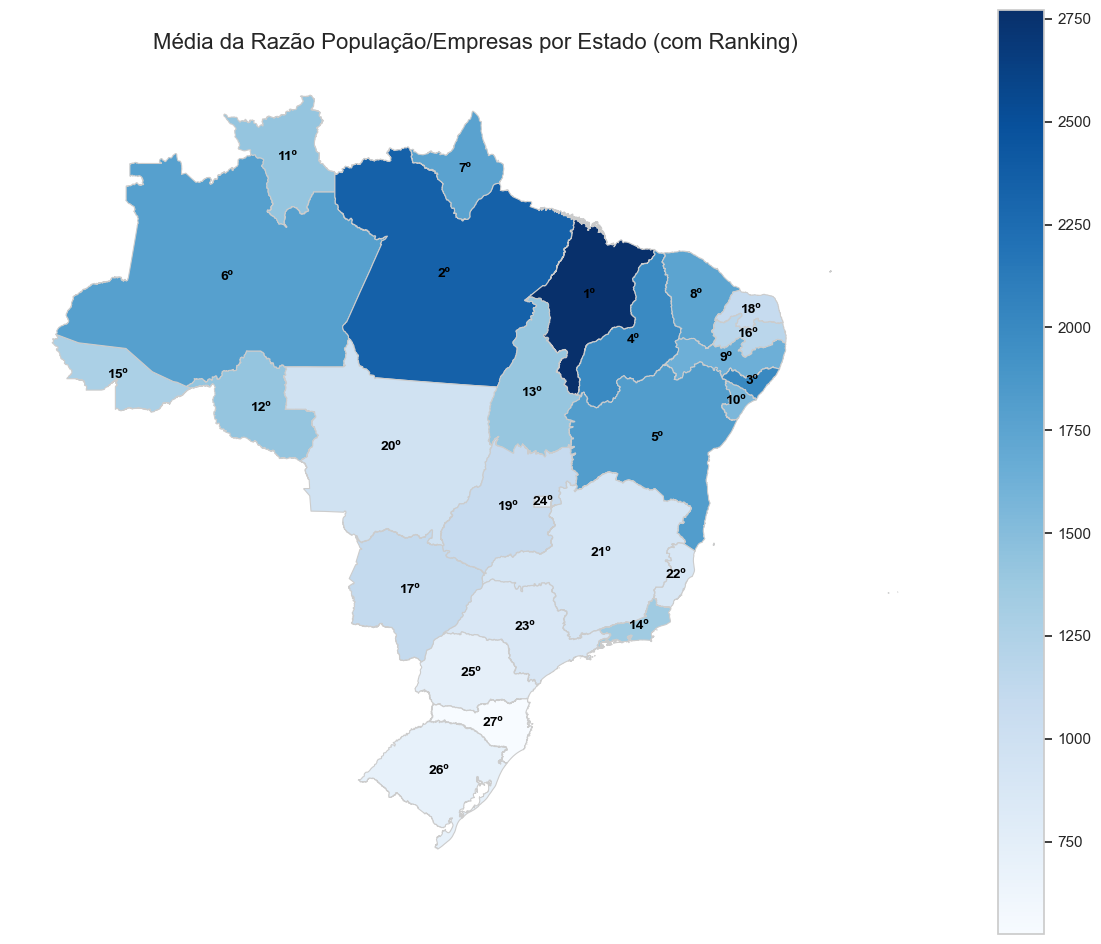

In [38]:
# 📊 GRÁFICO 1: Mapa Coroplético - Média da Razão População/Empresas por Estado (com Ranking)
# -------------------------------------------------------------
# Objetivo: Fornecer uma visão inicial e abrangente da distribuição das médias da razão 
# população/empresas por estado no Brasil, destacando o ranking diretamente no mapa.
# -------------------------------------------------------------

# 🔄 Importações necessárias
import geopandas as gpd
from geobr import read_state
import pandas as pd
import matplotlib.pyplot as plt

# 🔄 1. Calcular a média da razão população/empresas e o ranking
medias_estados = (
    df_final.groupby('estado')['razao_populacao_empresas']
    .mean()
    .reset_index()
    .rename(columns={'razao_populacao_empresas': 'media_razao'})
)
medias_estados['ranking'] = (
    medias_estados['media_razao']
    .rank(ascending=False, method='dense')
    .astype(int)
)

# 🔄 2. Carregar os dados geoespaciais e ajustar nomes
estados = read_state()
estados['name_state_lower'] = estados['name_state'].str.lower().str.strip()
medias_estados['estado'] = medias_estados['estado'].str.lower().str.strip()

# 🔄 3. Corrigir a grafia do Espírito Santo no geoespacial
estados['name_state_lower'] = estados['name_state_lower'].replace('espirito santo', 'espírito santo')

# 🔄 4. Mesclar os dados geoespaciais com as médias calculadas
mapa_brasil = estados.merge(medias_estados, left_on='name_state_lower', right_on='estado', how='left')

# 🔄 5. Criar o mapa coroplético
fig, ax = plt.subplots(1, 1, figsize=(15, 12))

mapa_brasil.plot(
    column='media_razao',  # Coluna de valores a serem plotados
    cmap='Blues',  # Esquema de cores
    linewidth=0.8,  # Espessura das bordas
    ax=ax,  # Eixo de plotagem
    edgecolor='0.8',  # Cor das bordas
    legend=True  # Exibir a legenda
)

# 🔄 6. Adicionar os rankings no centro dos estados com o símbolo "º"
for x, y, label in zip(mapa_brasil.geometry.centroid.x, mapa_brasil.geometry.centroid.y, mapa_brasil['ranking']):
    if not pd.isna(label):  # Evitar NaNs
        ax.text(x, y, f"{int(label)}º", fontsize=10, ha='center', va='center', color='black', weight='bold')

# 🔄 7. Ajustar o título e personalizações
plt.title('Média da Razão População/Empresas por Estado (com Ranking)', fontsize=16)
ax.set_axis_off()  # Remover os eixos para deixar o mapa mais limpo

# 🔄 8. Exibir o gráfico
plt.show()

### 💡 **Observações Iniciais - Mapa Coroplético: Média da Razão População/Empresas por Estado (com Ranking)**

**Contexto de Negócio:**  
A visualização inicial nos fornece um panorama claro de como está a distribuição da razão entre a população economicamente interessante (38-58 anos) e o número de empresas de construção civil em cada estado brasileiro. Esse índice é um ponto de partida crucial para identificar potenciais oportunidades e regiões mais saturadas.

---

#### 🔍 **Pontos de Destaque:**
1. **Alta razão (oportunidades futuras potenciais):**
   - **Maranhão (1º), Pará (2º), Alagoas (3º)**:  
     Esses estados apresentam os valores mais altos de razão, indicando uma população significativa na faixa etária de interesse em comparação ao número de empresas ativas. Isso pode significar uma demanda potencial ainda não plenamente explorada por construtoras.

2. **Razões moderadas (oportunidades de crescimento):**
   - **Bahia (5º), Amazonas (6º), Tocantins (13º):**  
     Apesar de estarem entre os primeiros colocados, a presença moderada de empresas sugere que o mercado pode estar em fase de expansão. Esses estados merecem análises detalhadas para confirmar o potencial.

3. **Baixa razão (possível saturação ou alta concorrência):**
   - **São Paulo (25º), Distrito Federal (24º), Santa Catarina (27º):**  
     Estados com grande concentração de empresas e, possivelmente, um mercado já maduro ou saturado. Como discutido, estados como Santa Catarina e São Paulo podem ter baixa razão devido à valorização do mercado imobiliário, mas isso não significa ausência de oportunidades. A análise do perfil de investimento é fundamental.

---

#### ⚠️ **Considerações Importantes:**
- A razão por si só não determina diretamente se há saturação ou oportunidade. É preciso analisar junto aos gráficos temporais e considerar outros fatores, como o crescimento populacional e a valorização imobiliária.
- O contexto de cidades específicas dentro dos estados pode diferir. Por exemplo, Santa Catarina aparece com baixa razão, mas cidades como Balneário Camboriú e Itajaí são destaques nacionais em valorização imobiliária.

---

#### 🔮 **Próximos Passos:**
- **Gráficos de barras:** Visualizar detalhadamente as médias e como os estados se comparam entre si.
- **Evolução temporal:** Observar se os padrões temporais indicam uma queda ou aumento na razão ao longo do tempo, especialmente durante a pandemia.

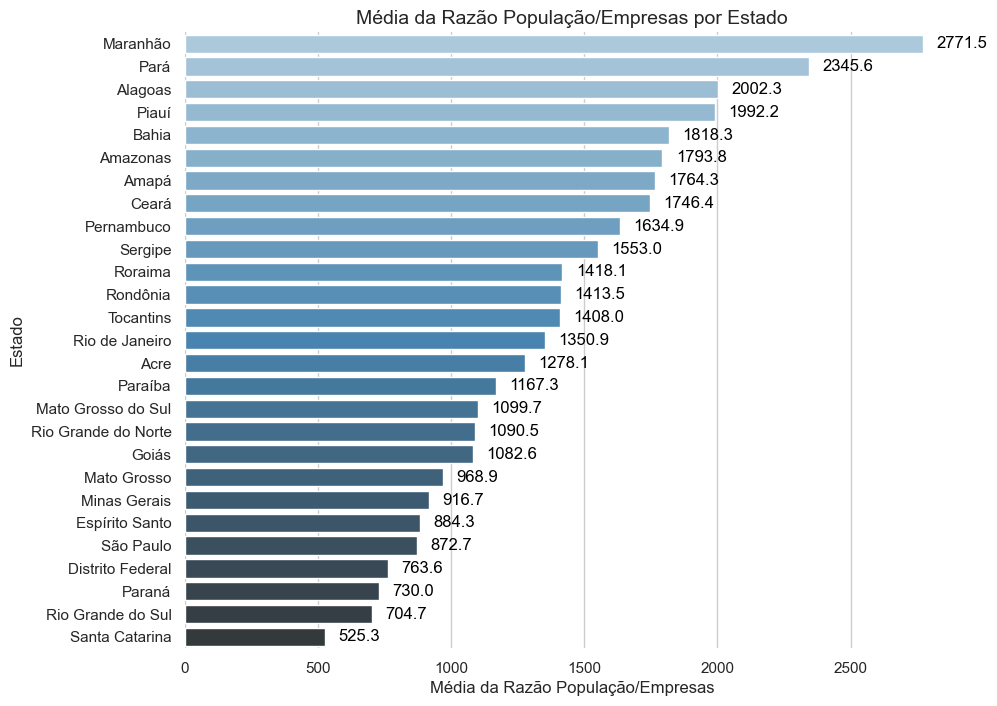

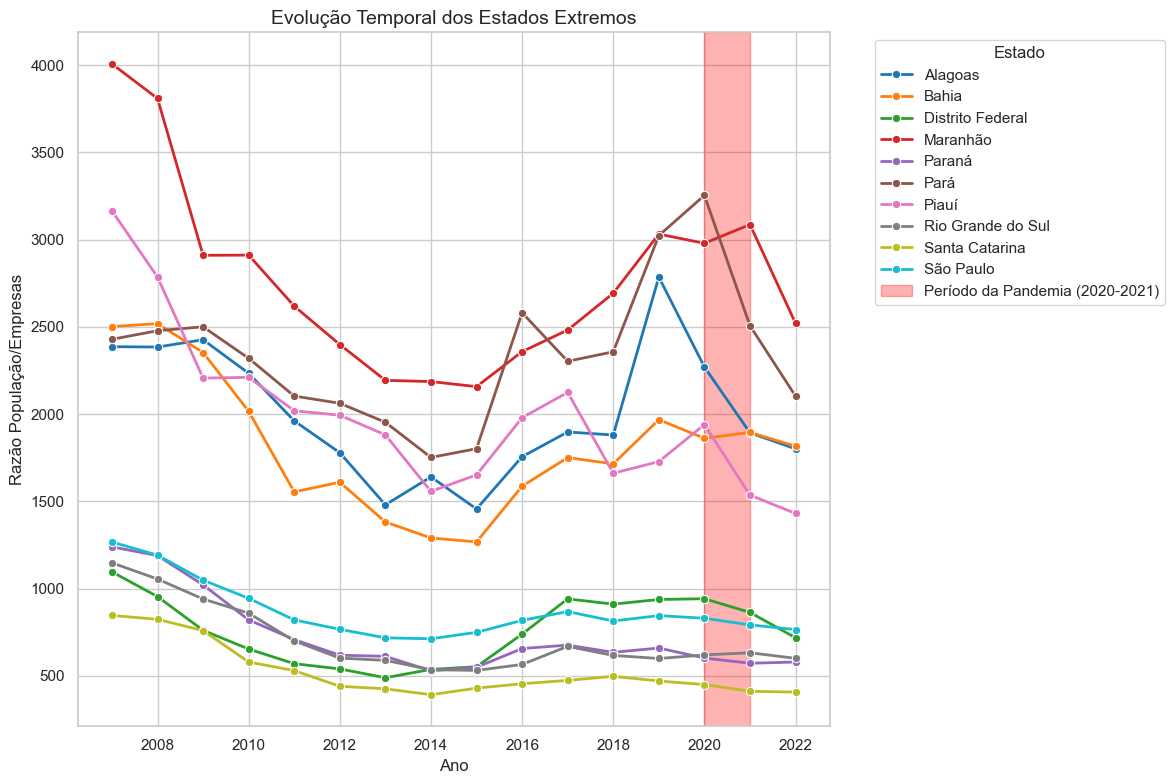

In [18]:
# 🔄 média da razão para visualização
medias_estados = (
    df_final.groupby('estado')['razao_populacao_empresas']
    .mean()
    .reset_index()
    .rename(columns={'razao_populacao_empresas': 'media_razao'})
    .sort_values(by='media_razao', ascending=False)
)

# 📊 GRÁFICO 1: Média da Razão População/Empresas por Estado
# -------------------------------------------------------------
# Objetivo: Visualizar a média da razão população/empresas por estado, destacando 
# quais estados possuem a maior ou menor média ao longo do período analisado (2007-2020).
# -------------------------------------------------------------

plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")

# 🔹 Criar o barplot com cores baseadas na escala de azul
ax = sns.barplot(
    data=medias_estados,
    x='media_razao',
    y='estado',
    palette='Blues_d',
    hue='estado',  # Associar a paleta ao estado
    legend=False  # Desativar a legenda
)

# 🔹 Adicionar valores numéricos ao final de cada barra
for i, (valor, estado) in enumerate(zip(medias_estados['media_razao'], medias_estados['estado'])):
    ax.text(valor + 50, i, f"{valor:.1f}", color='black', va='center')

# 🔹 Ajustar os rótulos e título
plt.title('Média da Razão População/Empresas por Estado', fontsize=14)
plt.xlabel('Média da Razão População/Empresas')
plt.ylabel('Estado')

# 🔹 Remover a linha de grade vertical para um visual mais limpo
sns.despine(left=True, bottom=True)

# 🔹 Exibir o gráfico
plt.show()


# 📊 GRÁFICO 2: Evolução Temporal dos Estados Extremos
# -------------------------------------------------------------
# Objetivo: Mostrar a evolução temporal da razão população/empresas para os 5 estados 
# com as maiores e menores médias, destacando o impacto da pandemia (2020-2021).
# -------------------------------------------------------------

# 🔄 Definir os estados extremos (5 maiores e 5 menores) novamente se necessário
top_5_estados = medias_estados.head(5)['estado'].tolist()
bottom_5_estados = medias_estados.tail(5)['estado'].tolist()

# 🔄 Filtrar os dados para os estados extremos
df_top_bottom = df_final[df_final['estado'].isin(top_5_estados + bottom_5_estados)]

# 🔹 Criar o gráfico de linhas
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=df_top_bottom,
    x='ano',
    y='razao_populacao_empresas',
    hue='estado',
    marker='o',
    linewidth=2,
    palette='tab10'
)

# 🔹 Adicionar faixa de sombra para o período da pandemia (2020-2021)
plt.axvspan(2020, 2021, color='red', alpha=0.3, label='Período da Pandemia (2020-2021)')

# 🔹 Ajustes de título, rótulos e grade
plt.title('Evolução Temporal dos Estados Extremos', fontsize=14)
plt.xlabel('Ano')
plt.ylabel('Razão População/Empresas')
plt.grid(True)

# 🔹 Ajustar a legenda para fora do gráfico
plt.legend(title='Estado', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# 🔹 Exibir o gráfico
plt.show()

### 💡 **Observações: Interpretação da Razão População/Empresas e Contextualização Regional**

**Análise Geral:**  
- A razão população/empresas por estado apresenta uma distribuição significativa, com **Maranhão (2771,5)** e **Pará (2345,6)** liderando, enquanto **Santa Catarina (525,3)** e **Rio Grande do Sul (704,7)** estão entre os menores valores.  
- Estados com uma **alta razão**, como **Maranhão, Pará e Alagoas**, indicam uma potencial **suboferta de empresas em relação à população**, sugerindo oportunidades de expansão, especialmente para empresas de médio a grande porte.  
- Já os estados com **baixa razão**, como **Santa Catarina e São Paulo**, podem indicar uma **maior saturação do mercado** ou, como veremos, estar associados a mercados mais maduros e valorizados.

---

**Impacto Regional e de Mercado:**  
- Estados como **Santa Catarina**, **São Paulo** e **Paraná**, apesar de apresentarem uma baixa razão, possuem um mercado imobiliário altamente segmentado e competitivo.  
- De acordo com o **Índice FipeZAP de janeiro de 2025**, as cidades de Santa Catarina dominam o ranking do metro quadrado mais caro do Brasil, com destaque para:  
  - **Balneário Camboriú (R$ 13.911,00/m²)** - o mais caro do Brasil.  
  - **Itapema, Itajaí e Florianópolis**, também entre os primeiros colocados.  
- Isso sugere que a baixa razão nesses locais não indica necessariamente saturação, mas sim um mercado de **alto valor agregado**, com foco em empreendimentos de luxo e consumidores de alta renda.

---

**Efeitos da Pandemia (2020-2021):**  
- Durante o período da pandemia (destacado na evolução temporal), houve oscilações significativas, especialmente nos estados de maior razão, como Maranhão e Pará.  
- Essa volatilidade pode ser explicada pela desaceleração econômica e os impactos no setor da construção civil durante esse período.

---

**Conclusão e Recomendações:**  
- **Estados de alta razão (ex: Maranhão, Pará, Alagoas):** São indicados para estratégias de expansão, com foco na abertura de novas empresas e projetos de médio porte.  
- **Estados de baixa razão (ex: Santa Catarina, São Paulo, Paraná):** Demandam uma análise estratégica mais refinada. Embora a concorrência seja elevada, oportunidades existem em nichos de luxo e empreendimentos de alto padrão, especialmente nas regiões com alto valor por metro quadrado.

Esta análise destaca a importância de **não interpretar a razão de maneira isolada**, mas integrá-la ao contexto econômico e imobiliário de cada região para identificar as oportunidades reais.


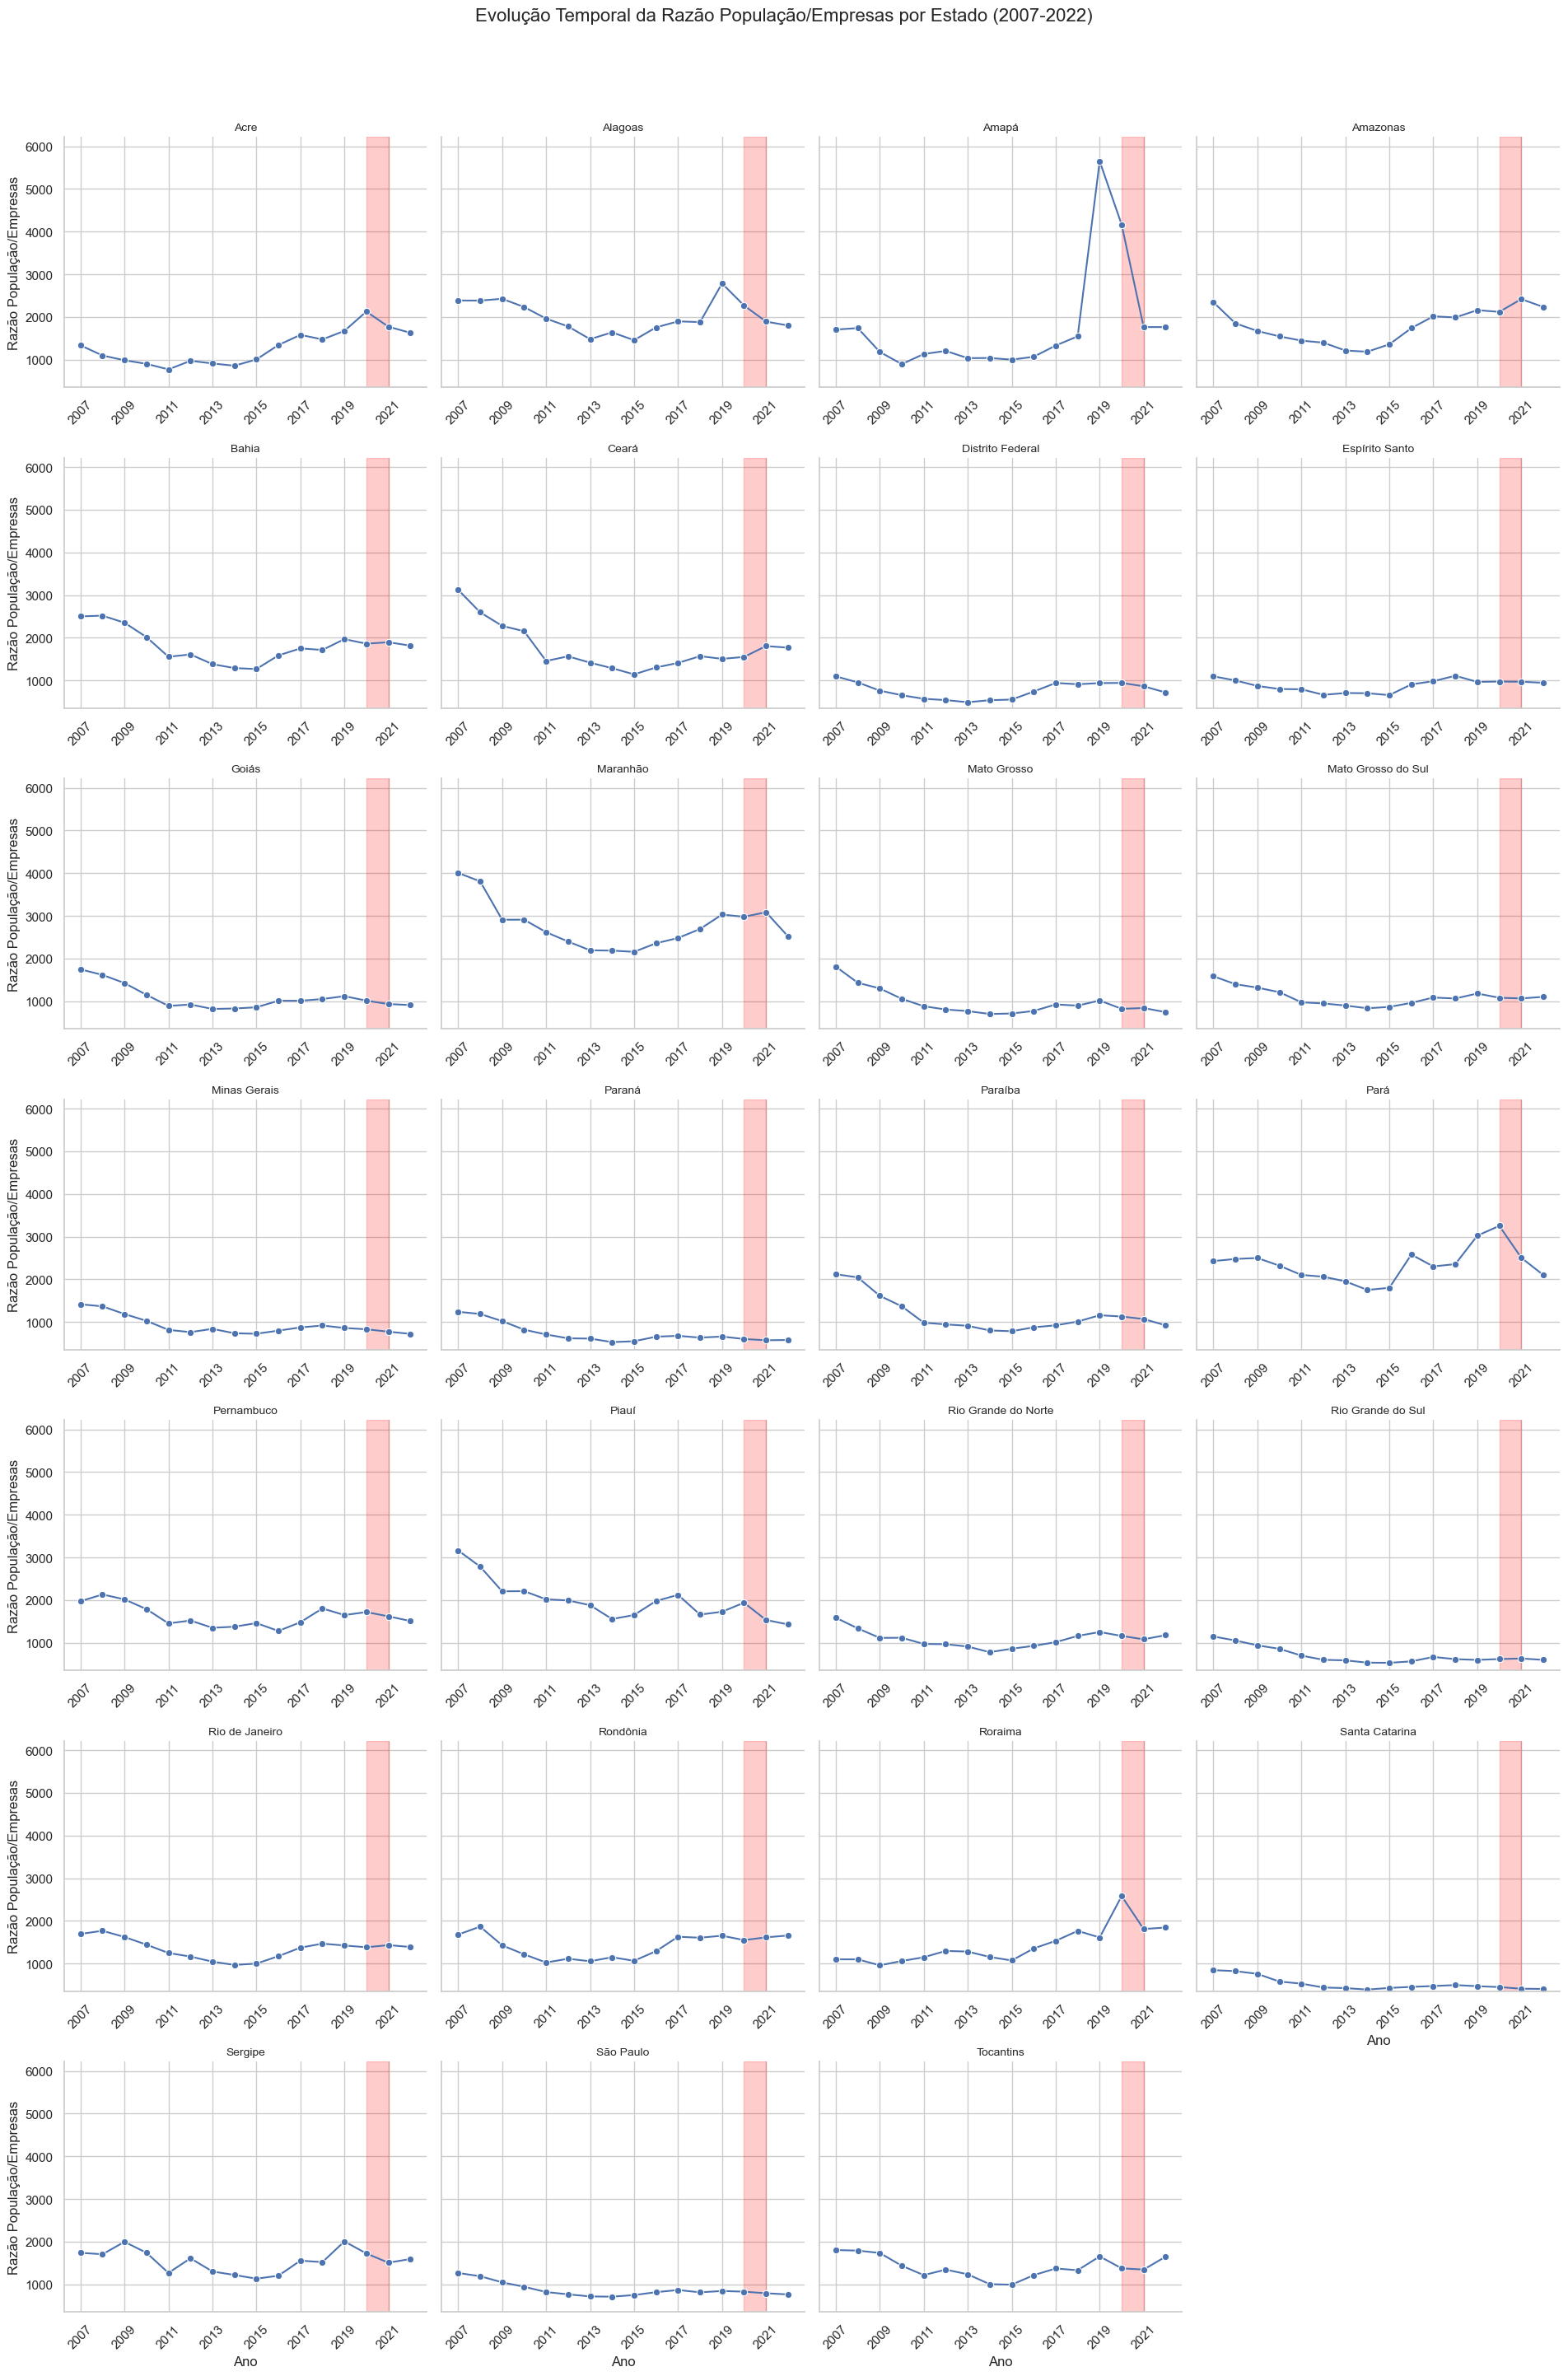

In [66]:
# 📊 GRÁFICO: Evolução Temporal da Razão População/Empresas por Estado
# -------------------------------------------------------------
# Objetivo: Visualizar a evolução temporal da razão população/empresas para todos os estados brasileiros,
# permitindo identificar tendências de crescimento, queda ou estabilidade.
# A escala fixa no eixo y facilita a comparação direta entre os estados.
# -------------------------------------------------------------

import seaborn as sns
import matplotlib.pyplot as plt

# 🔄 Definir o intervalo fixo para o eixo y com uma margem de segurança (+/- 10%)
y_limite_min = df_final['razao_populacao_empresas'].min() * 0.9
y_limite_max = df_final['razao_populacao_empresas'].max() * 1.1

# 🔄 Criar o FacetGrid para desenhar gráficos separados para cada estado
g = sns.FacetGrid(
    data=df_final,
    col="estado",  # Um gráfico por estado
    col_wrap=4,  # 4 gráficos por linha
    height=4,  # Altura de cada gráfico
    aspect=1.2,  # Proporção largura/altura
    sharey=True  # Compartilhar o mesmo eixo y
)

# 🔄 Mapear o gráfico de linha com marcador para cada ano
g.map_dataframe(
    sns.lineplot, 
    x="ano", 
    y="razao_populacao_empresas", 
    marker="o"
)

# 🔄 Definir os limites fixos do eixo y
g.set(ylim=(y_limite_min, y_limite_max))

# 🔄 Destacar o período da pandemia (2020-2021) com uma faixa vermelha transparente
for ax in g.axes.flat:
    ax.axvspan(2020, 2021, color='red', alpha=0.2)
    ax.set_xticks(range(2007, 2023, 2))  # Definir os ticks do eixo x a cada 2 anos
    ax.set_xticklabels(range(2007, 2023, 2), rotation=45)  # Rotacionar os rótulos para legibilidade

# 🔄 Forçar exibição dos rótulos do eixo x em todos os gráficos
for ax in g.axes.flat:
    ax.tick_params(axis='x', which='both', labelbottom=True)  # Mostrar os rótulos em todos

# 🔄 Ajustes de rótulos, títulos e legendas
g.set_axis_labels("Ano", "Razão População/Empresas")  # Rótulos dos eixos
g.set_titles(col_template="{col_name}", size=10)  # Título de cada gráfico com o nome do estado
g.fig.suptitle('Evolução Temporal da Razão População/Empresas por Estado (2007-2022)', y=1.03, fontsize=16)

# 🔄 Exibir o layout ajustado e o gráfico final
plt.tight_layout()  # Ajustar espaçamento entre gráficos
plt.show()

#### 💡 **Observações:**

**Análise Geral**:  
- A evolução temporal da razão população/empresas por estado revela uma distribuição clara das tendências de crescimento, queda e estabilidade nos estados ao longo dos anos. É possível observar picos relevantes, principalmente em 2020-2021, período de impacto da pandemia.

**Pontos de Destaque**:

1. **Aumento Significativo de Razão**:  
   - **Amapá** (2017): Apresenta um pico expressivo, que provavelmente reflete algum evento ou mudança significativa no mercado local.
   - **Roraima** (2020): A razão população/empresas mostra uma elevação marcante, indicando uma possível recuperação ou um impulso no número de empresas ativas.
   - **Maranhão e Pará**: Estados que estão se destacando com uma maior razão população/empresas, o que pode indicar uma expansão do mercado e um crescimento em negócios, possivelmente no setor de construção civil.

2. **Estabilidade ou Queda**:  
   - **Santa Catarina** e **São Paulo**: Mostram um comportamento mais estável e com quedas graduais, sugerindo que esses estados podem já estar em um estágio de maturação de mercado, o que pode ser interpretado como uma saturação ou maior concorrência.
   - **Distrito Federal**: Segue uma tendência de estabilidade, mas a baixa variação sugere um mercado consolidado.

3. **Impacto da Pandemia**:  
   - O impacto da pandemia é visível, com estados como **Roraima** e **Amapá** tendo picos significativos no período de 2020-2021. Outros estados, como **São Paulo** e **Distrito Federal**, apresentam uma linha de tendência mais estável, possivelmente refletindo menos instabilidade ou um setor mais resiliente.


**Próximos Passos**:  

1. **Análise de Tendências Regionais**:  
   - Comparar estados de diferentes regiões e como eles se comportaram ao longo do tempo. Isso pode nos dar insights sobre o desenvolvimento e as oportunidades em diferentes regiões do Brasil.